# Exploratory Data Analysis
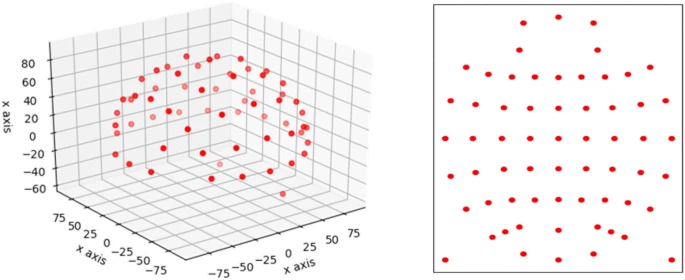
the initial analysis, to study and learn more about the data being dealt with.

In [1]:
# loading the libraries
import os
import pickle
import sys
import warnings
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## The Motion dataset: [Grasp and Lift Detection](https://www.kaggle.com/competitions/grasp-and-lift-eeg-detection)

There are 12 subjects in total, 10 series of trials for each subject, and approximately 30 trials within each series. The number of trials varies for each series. The training set contains the first 8 series for each subject. The test set contains the 9th and 10th series.

the motions part of the dataset.

1. HandStart
2. FirstDigitTouch
3. BothStartLoadPhase
4. LiftOff
5. Replace
6. BothReleased

### File structure
for each series there are two csv files one consisting of labels and the other consisting of raw eeg signals.

In [2]:
dataset_dir="/home/sumitm/grasp-and-lift-eeg-detection/train/subj10_series1_"

inputs = {
    "data": f"{dataset_dir}data.csv",
    "events": f"{dataset_dir}events.csv",
}

data_specifications = {}
for k, v in inputs.items():
#     print(k)
    data_specifications[k] = pd.read_csv(v)

data
events


 a check to see if there are any missing values and if the 6 ranges of motion exist, it can be observed from the constant mean values and std, that there are a lot of period where the subject is not pursuing any action.
 
 To work around this issue, i should drop a portion of data which is not going to be useful in inference. To save on memory and improve the processing speed. preferable choose periods based on mean.
 

In [3]:
data_specifications['events'].describe()


,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
count,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000
mean,0.019437,0.019437,0.019437,0.019437,0.019437,0.019437
std,0.138055,0.138055,0.138055,0.138055,0.138055,0.138055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Exploring the raw eeg data, the channels observed and their charactersitics to look for any patterns that can be used to infer motions.

Unfortunately this venture did not bear any fruit, as the signals seemed quite similar to white noise in the time domain.

In [4]:
data_specifications['data'].describe()


,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
count,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,...,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000,262387.000000
mean,-86.238510,-208.771627,-122.016967,-427.069051,-351.648542,-206.431222,-323.689005,-54.680392,-236.035692,-304.621666,...,-204.783690,-369.480565,-125.396853,-243.953611,-119.396578,-330.901874,-218.154139,-640.792612,-353.016826,-467.407311
std,269.620152,254.806070,278.971481,161.268718,146.001852,270.501995,168.565288,190.552756,71.387063,194.954165,...,176.353497,186.829252,164.629680,140.499600,178.106856,171.757050,170.681583,185.227185,159.828020,209.278635
min,-1086.000000,-1224.000000,-1495.000000,-989.000000,-758.000000,-1448.000000,-3503.000000,-1197.000000,-498.000000,-914.000000,...,-1097.000000,-1442.000000,-972.000000,-1028.000000,-1195.000000,-1661.000000,-1342.000000,-1801.000000,-1614.000000,-1774.000000
25%,-250.000000,-358.000000,-281.000000,-537.000000,-458.000000,-377.000000,-435.000000,-168.000000,-289.000000,-433.000000,...,-321.000000,-487.000000,-241.000000,-339.000000,-234.000000,-442.000000,-333.000000,-765.000000,-457.000000,-610.000000
50%,-84.000000,-203.000000,-115.000000,-435.000000,-355.000000,-233.000000,-322.000000,-42.000000,-229.000000,-308.000000,...,-203.000000,-367.000000,-130.000000,-244.000000,-117.000000,-330.000000,-221.000000,-647.000000,-355.000000,-468.000000
75%,67.000000,-59.000000,37.000000,-322.000000,-257.000000,-49.000000,-210.000000,76.000000,-183.000000,-186.000000,...,-87.000000,-249.000000,-13.000000,-151.000000,-2.000000,-217.000000,-108.000000,-522.000000,-250.000000,-325.000000
max,2414.000000,2307.000000,1921.000000,498.000000,161.000000,824.000000,1888.000000,995.000000,-4.000000,284.000000,...,864.000000,360.000000,562.000000,316.000000,860.000000,454.000000,534.000000,143.000000,411.000000,409.000000


below is the function to create timeplots, for illustrating the EEG data

```python
def timeplots(df,t = False):
    
    for x in df:
        if x != 'timestamps':
            plt.figure(figsize=(20,5))
            if (t==False):
                plt.boxplot(df[x])
                plt.title(x)
                plt.xlabel('time')
                plt.show()
            plt.figure(figsize=(20,5))
            plt.plot(df['timestamps'],df[x])
            plt.title(x)
            plt.xlabel('time')
            plt.show()
timeplots(data_specifications['data'])
```

In [5]:
df = (data_specifications['data'])

## Challenges
The Motion and the Emotion dataset are of different sizes and are collected from the subjects using different devices. The EEG device for Motion observed 32 EEG channels as listed below, whereas for Emotion dataset there are 66 electrode nodes observed after adjusting for bad channels (essentially EEG channels that have more noise and dont help in our goal)

In [6]:
print(list(df))
len(list(df))


['id', 'Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']


33

['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'VEO', 'HEO']

In [8]:
SEEDlist = ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'VEO', 'HEO']

In [11]:
len(SEEDlist)

66

Plot of F4 electrode node, 
to illustrate the white noise process observed.

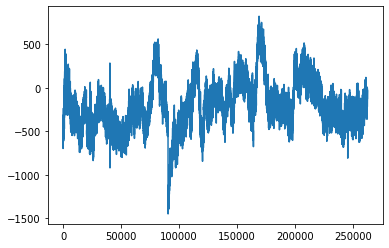

In [9]:
plt.plot(df['F4'])

#### String operations

A solution to our problem can be best illustrated using this venn diagram

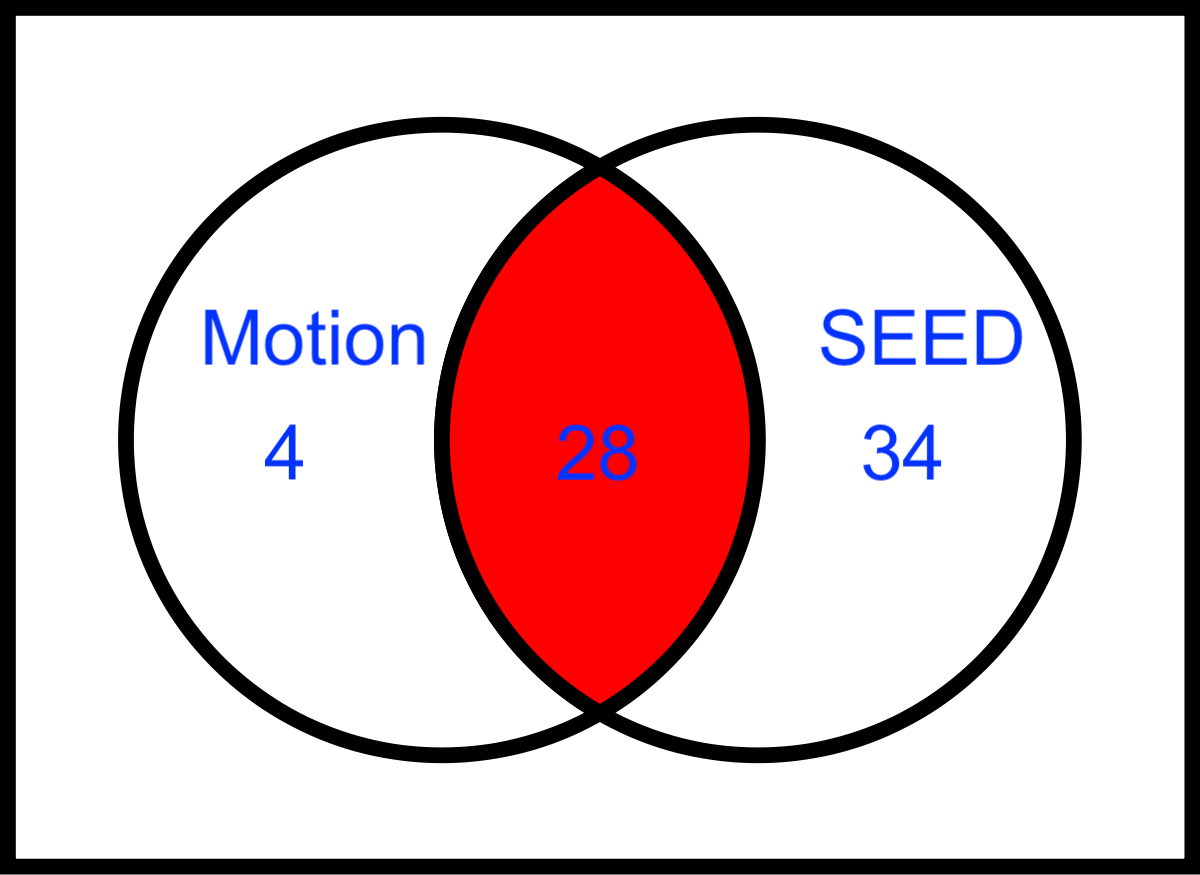

there are 68 channels in Emotion and 33 in the Motion, we use the intersection of these nodes giving us 28 nodes to work with.

In [7]:
test = list()
for x in list(df):
    test.append(x.upper())
test

['ID',
 'FP1',
 'FP2',
 'F7',
 'F3',
 'FZ',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'CZ',
 'C4',
 'T8',
 'TP9',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'TP10',
 'P7',
 'P3',
 'PZ',
 'P4',
 'P8',
 'PO9',
 'O1',
 'OZ',
 'O2',
 'PO10']

In [13]:
motionset = set(test)
emotionset = set(SEEDlist)
print(emotionset.intersection(motionset))

{'CP5', 'P7', 'CP1', 'FP2', 'F4', 'P3', 'O1', 'FC5', 'FC1', 'T8', 'PZ', 'O2', 'FC6', 'T7', 'F7', 'F3', 'C4', 'FC2', 'CP6', 'F8', 'OZ', 'FZ', 'FP1', 'C3', 'CZ', 'CP2', 'P8', 'P4'}


In [15]:
intersection = ['Fp1', 'FC1', 'Fp2', 'P7', 'FC5', 'T7', 'F8', 'P4', 'CP5', 'P3', 'T8', 'Oz', 'FC6', 'O2', 'Cz', 'Fz', 'P8', 'C3', 'CP6', 'CP2', 'CP1', 'Pz', 'O1', 'F3', 'F7', 'C4', 'FC2', 'F4']
print(list(intersection))
len(list(intersection))

['Fp1', 'FC1', 'Fp2', 'P7', 'FC5', 'T7', 'F8', 'P4', 'CP5', 'P3', 'T8', 'Oz', 'FC6', 'O2', 'Cz', 'Fz', 'P8', 'C3', 'CP6', 'CP2', 'CP1', 'Pz', 'O1', 'F3', 'F7', 'C4', 'FC2', 'F4']


28

In [16]:
df['F4'].tail(1)

262386   -120
Name: F4, dtype: int64

In [17]:
df[intersection].shape

(262387, 28)